# Exploratory Data Analysis of Electric Vehicle Population Data

- **Course:** CS660/71425 Mathematical Foundations of Analytics
- **Instructor:** Prof. Sarbanes
- **Group-1:** Will Torres, Mike Griffin, Watson Blair, Syed Abdul Mubashir, Mohammed Abdul Munaf
- **Semester:** Fall 2024
- **Project #:** 1
- **Due Date:** 07-Oct-2024

## Project Description
Exploratory Data Analysis (EDA) is essential for understanding, cleaning, and preparing data for further analysis in data science projects. This project focuses on analyzing the Electric Vehicle (EV) population dataset from Washington State, USA.


## Questions to be Answered
1. Which car manufacturers are most commonly used for EVs in Washington?
2. What are the highest and lowest electric ranges in this dataset, and which car makers and models do they correspond to?
3. Is the maximum electric range value unique? If not, which cars share this range?
4. Is the minimum electric range value unique? If not, which cars share this range?
5. How does the electric range vary between car makers and between models?
6. Which are the top 5 cities adopting EVs?
7. How does the EV adoption rate vary among car makers over the years?
8. Is there a correlation between the electric range and the city of an EV?
9. Which county has the greatest variety of EV car models?

## EDA

### Step 1: Understand the Dataset Context

_Washington State Department of Licensing_'s dataset tracks **Battery Electric Vehicles** (BEVs) and **Plug-in Hybrid Electric Vehicles** (PHEVs) registered in Washington state. This dataset is updated monthly and offers insights into the electric vehicle population, categorized by county, postal code, and vehicle characteristics.

**Key Dataset Details**:
- Data Source: Washington State Department of Licensing.
- Objective: To provide a comprehensive overview of electric vehicles registered in Washington, segmented by various geographical and vehicle-specific metrics. It helps track the adoption of electric vehicles across different regions.
- Metadata: The dataset is updated regularly (most recently on September 16, 2024) and covers registered electric vehicles as of August 31, 2024.  

**Notable Fields**:
- VIN (1-10): The first 10 characters of the Vehicle Identification Number.
- County/**City**/State/Postal Code: Geographic data identifying where the vehicle is registered.
- **Model Year**, **Make**, **Model**: Vehicle characteristics.
- Electric Vehicle Type: Whether the vehicle is a BEV or PHEV.
- **Electric Range**: The distance a vehicle can travel on electric charge.
- Legislative District: The political district in which the vehicle owner resides.  

**Objective Clarification**:
- The goal of using this data could be to analyze electric vehicle adoption trends in Washington, identify regions with the highest EV adoption, or track specific vehicle models.

### Step 2: Import Libraries and Load Data
- **Import Necessary Libraries:** `pandas`, `numpy`, `matplotlib`, `seaborn`
- **Load the Dataset:** `EV_Population_WA_Data.csv`

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('data/EV_Population_WA_Data.csv')

### Step 3: Initial Data Inspection
- **View Data Structure:** `.head()`, `.info()`, `.describe()`
- **Check Dimensions:** `.shape()`
- **Identify Missing Values:** `.isnull().sum()`

In [4]:
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY1Z4C51E,Yakima,Yakima,WA,98908.0,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,14.0,8045817,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
6,5YJSA1DPXC,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265,59900,22.0,188634442,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
7,5YJSA1H27F,Yakima,Yakima,WA,98908.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,14.0,109175566,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
8,7FCTGBAA7P,Kitsap,Poulsbo,WA,98370.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,262803131,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
9,3C3CFFGE7H,King,Seattle,WA,98103.0,2017,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,43.0,9411349,POINT (-122.3499053 47.673887),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,200044.000000,200048.000000,200048.000000,200048.000000,199606.000000,2.000480e+05,2.000440e+05
mean,98176.178121,2020.871261,53.485279,947.551913,28.986063,2.262988e+08,5.297545e+10
std,2424.207811,2.994933,88.786301,7860.591091,14.908108,7.282433e+07,1.605628e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.904573e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.363396e+08,5.303303e+10
75%,98372.000000,2023.000000,53.000000,0.000000,42.000000,2.609659e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} cols")

Dataset Shape: 200048 rows, 17 cols


In [8]:
df.isnull().sum().sort_values(ascending = False)

Legislative District                                 442
Vehicle Location                                       8
2020 Census Tract                                      4
County                                                 4
City                                                   4
Postal Code                                            4
Electric Utility                                       4
VIN (1-10)                                             0
State                                                  0
Electric Vehicle Type                                  0
Model                                                  0
Make                                                   0
Model Year                                             0
Base MSRP                                              0
Electric Range                                         0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
DOL Vehicle ID                                         0
dtype: int64

### Step 4: Data Cleaning
- **Handle Missing/Incomplete Data**
  - Range Data
- **Handle Outliers**
- **Correct Data Types**
  - transform categorical data into numeric values for use in correlation operations 
  - 
- **Handle Duplicates**

In [4]:
from utils import calculateRange, calculateMSRP, convertEligibility

# Note: The questions pertain to the following columns:
# Model Year, Model, Make, Electric Range, City, County
# Focusing our data cleaning, prep, analysis, and feature engineering to these cols might be beneficial.

# Other cleaning:
# - Standardizing Electric Utility, Dropping Duplicates + Missing Vals, imputing values in ER (and MSRP), etc.cleanData = rawData.copy(deep=True)

cleanData = calculateRange(cleanData)

cleanData = calculateMSRP(cleanData) # Corrects aprox 10,000 records

cleanData = convertEligibility(cleanData)



In [18]:
print(cleanData['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())



['Clean Alternative Fuel Vehicle Eligible'
 'Eligibility unknown as battery range has not been researched'
 'Not eligible due to low battery range']


### Step 5: Univariate Analysis
- **Summary Statistics**
- **Visualize Distributions:** histograms, box plots, bar charts

In [10]:
# Summary Statistics for categorical columns
categorical_summary = df.describe(include=['object'])
categorical_summary

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,200048,200044,200044,200048,200048,200048,200048,200048,200040,200044
unique,11978,199,763,45,42,151,2,3,917,74
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1219,102837,32602,199606,88083,41986,156956,109401,5064,73386


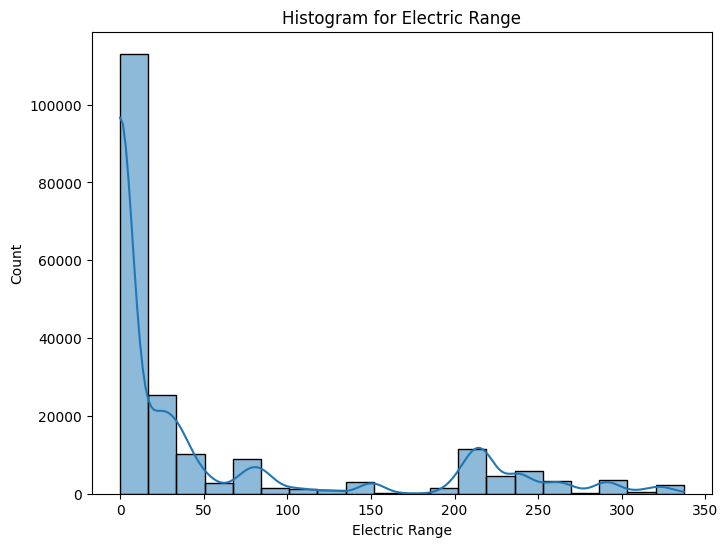

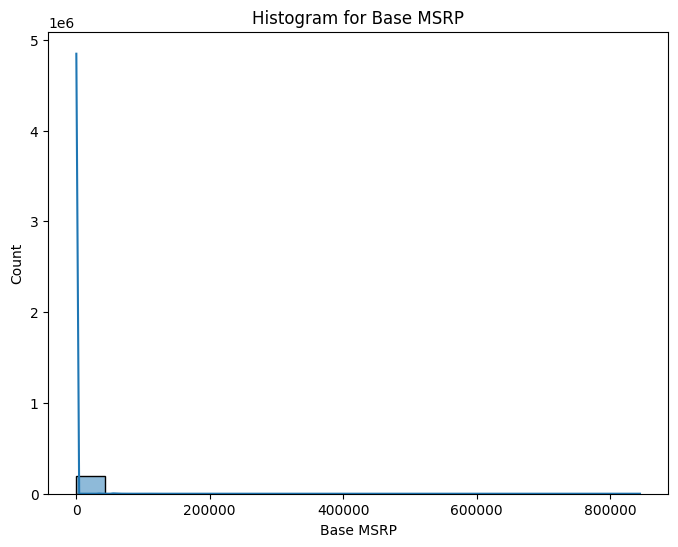

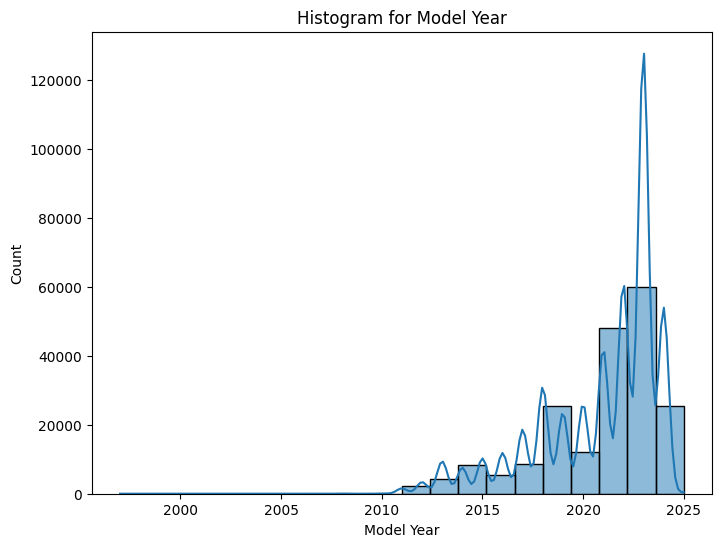

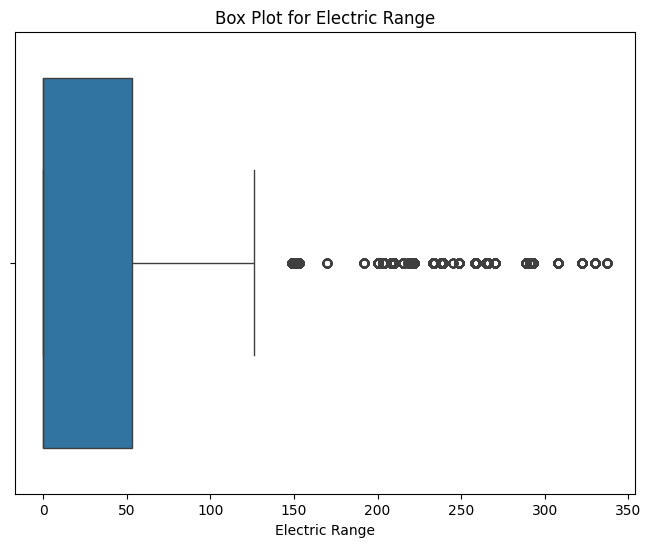

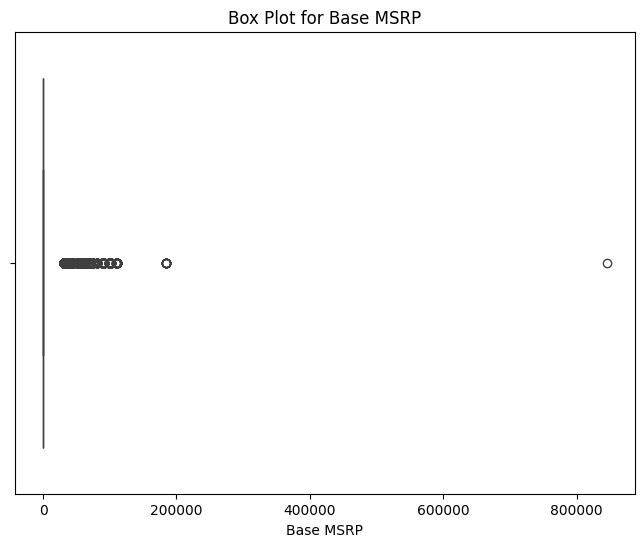

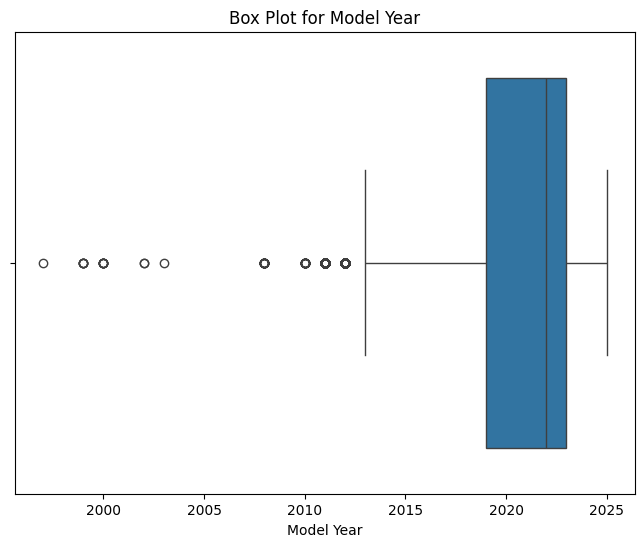

In [11]:
# Visualizing distributions for numerical variables
num_cols = ['Electric Range', 'Base MSRP', 'Model Year']

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram for {col}')
    plt.show()

# Box plots for numerical variables
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

C:\Users\torrw\AppData\Local\Temp\ipykernel_15324\706180219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.values, y=top_5_cities.index, palette="viridis")


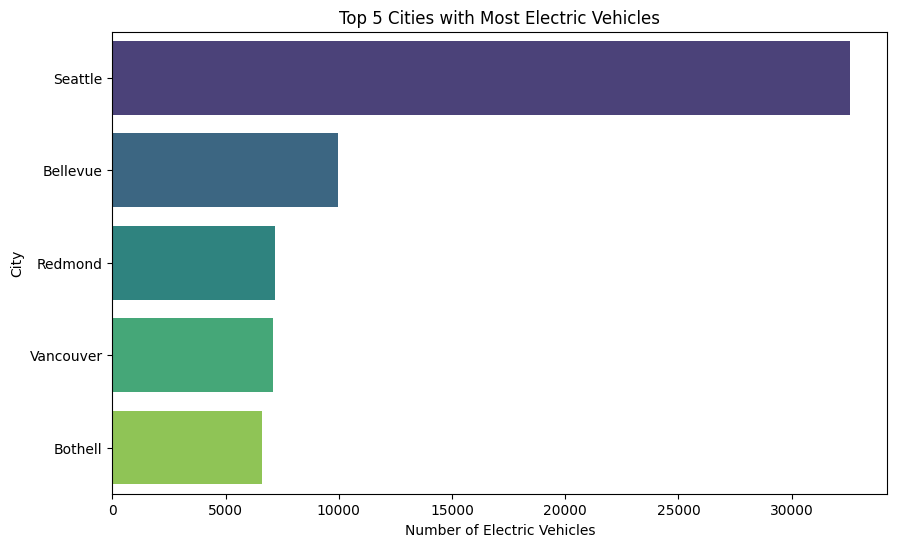

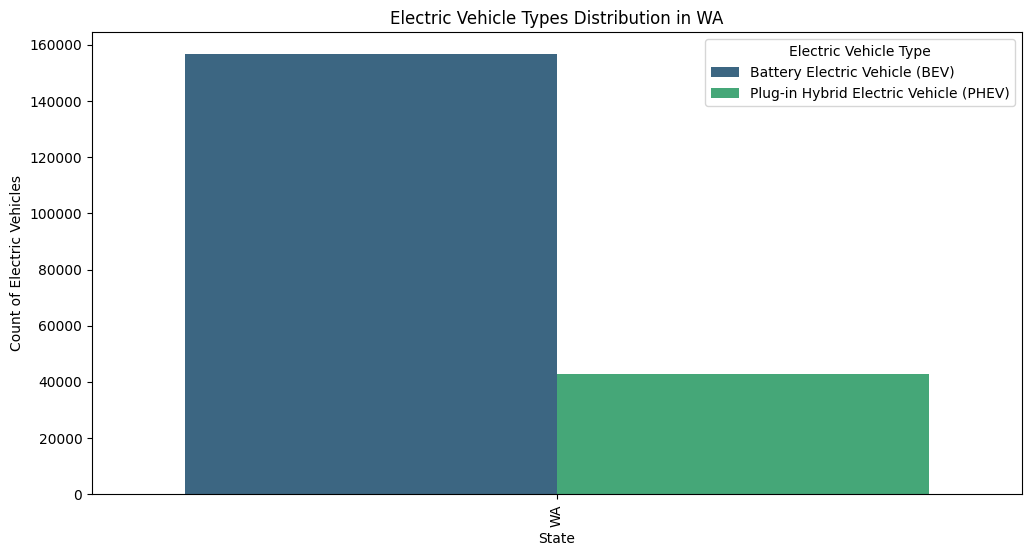

C:\Users\torrw\AppData\Local\Temp\ipykernel_15324\706180219.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_makes.values, y=top_10_makes.index, ax=axes[0, 0], palette="viridis")
C:\Users\torrw\AppData\Local\Temp\ipykernel_15324\706180219.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_makes.values, y=bottom_10_makes.index, ax=axes[0, 1], palette="viridis")
C:\Users\torrw\AppData\Local\Temp\ipykernel_15324\706180219.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_models.values, y=top_10_models.inde

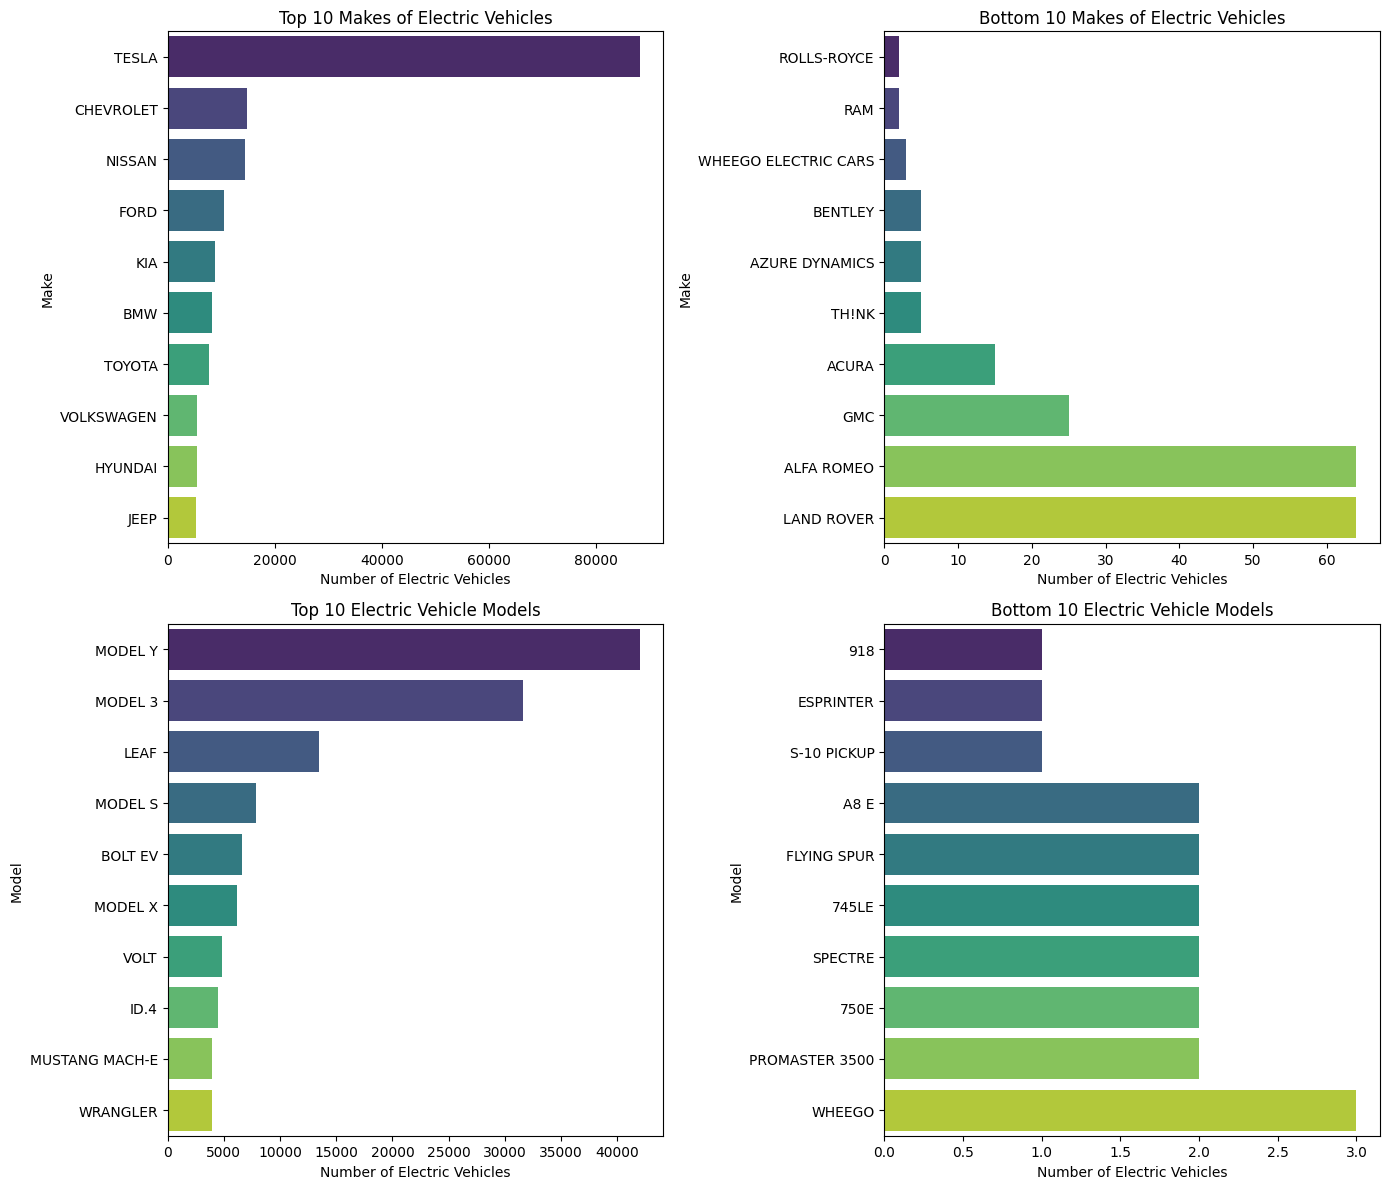

In [12]:
# Top 5 Cities with Most Electric Vehicles
def plot_top_5_cities(df):
    top_5_cities = df['City'].value_counts().nlargest(5)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_5_cities.values, y=top_5_cities.index, palette="viridis")
    plt.title('Top 5 Cities with Most Electric Vehicles')
    plt.xlabel('Number of Electric Vehicles')
    plt.ylabel('City')
    plt.show()

# Electric Vehicle Types Distribution by State (for Washington 'WA')
def plot_ev_type_by_state(df, state='WA'):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df[df.State == state], x='State', hue='Electric Vehicle Type', palette="viridis")
    plt.title(f'Electric Vehicle Types Distribution in {state}')
    plt.xlabel('State')
    plt.ylabel('Count of Electric Vehicles')
    plt.xticks(rotation=90)
    plt.legend(title='Electric Vehicle Type')
    plt.show()

# Top 10 and Bottom 10 Makes and Models Subplots
def plot_top_bottom_makes_models(df):
    # Data preparation for top and bottom makes and models
    top_10_makes = df['Make'].value_counts().nlargest(10)
    bottom_10_makes = df['Make'].value_counts().nsmallest(10)
    top_10_models = df['Model'].value_counts().nlargest(10)
    bottom_10_models = df['Model'].value_counts().nsmallest(10)

    # Create subplots: 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Top 10 Makes
    sns.barplot(x=top_10_makes.values, y=top_10_makes.index, ax=axes[0, 0], palette="viridis")
    axes[0, 0].set_title('Top 10 Makes of Electric Vehicles')
    axes[0, 0].set_xlabel('Number of Electric Vehicles')
    axes[0, 0].set_ylabel('Make')

    # Bottom 10 Makes
    sns.barplot(x=bottom_10_makes.values, y=bottom_10_makes.index, ax=axes[0, 1], palette="viridis")
    axes[0, 1].set_title('Bottom 10 Makes of Electric Vehicles')
    axes[0, 1].set_xlabel('Number of Electric Vehicles')
    axes[0, 1].set_ylabel('Make')

    # Top 10 Models
    sns.barplot(x=top_10_models.values, y=top_10_models.index, ax=axes[1, 0], palette="viridis")
    axes[1, 0].set_title('Top 10 Electric Vehicle Models')
    axes[1, 0].set_xlabel('Number of Electric Vehicles')
    axes[1, 0].set_ylabel('Model')

    # Bottom 10 Models
    sns.barplot(x=bottom_10_models.values, y=bottom_10_models.index, ax=axes[1, 1], palette="viridis")
    axes[1, 1].set_title('Bottom 10 Electric Vehicle Models')
    axes[1, 1].set_xlabel('Number of Electric Vehicles')
    axes[1, 1].set_ylabel('Model')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call functions with df
plot_top_5_cities(df)
plot_ev_type_by_state(df, state='WA')
plot_top_bottom_makes_models(df)

### Step 6: Bivariate Analysis
- **Correlation Analysis**: (e.g., Pearson, Spearman)
- **Cross-tabulation**
- **Visualize Relationships:** scatter plots, box plots, heatmaps

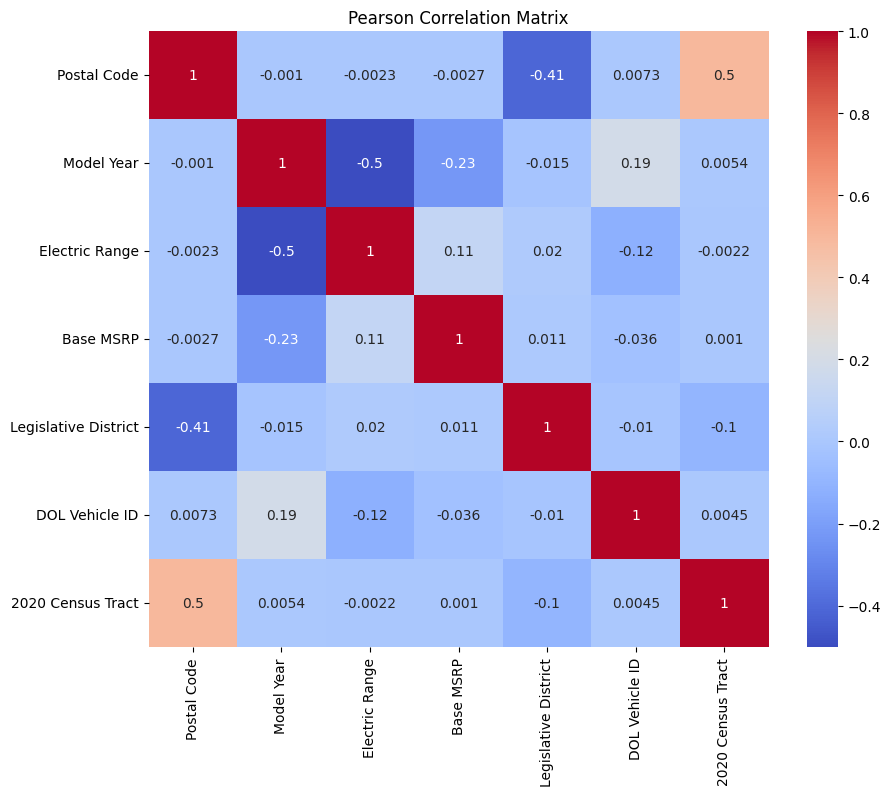

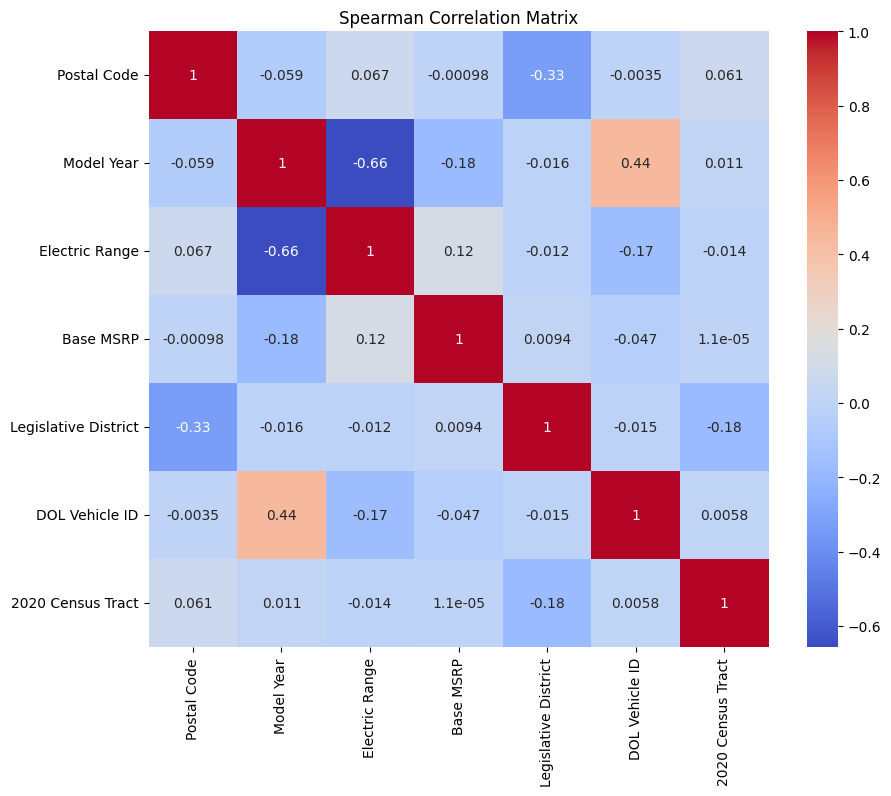

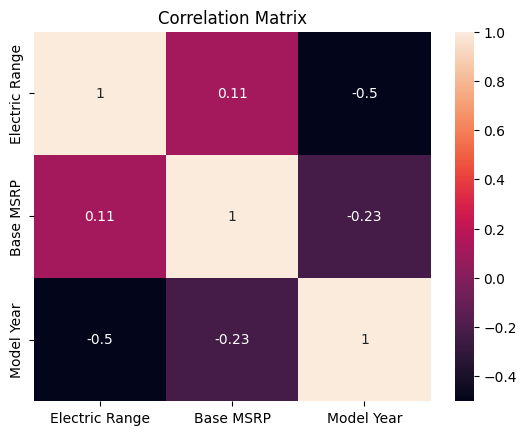

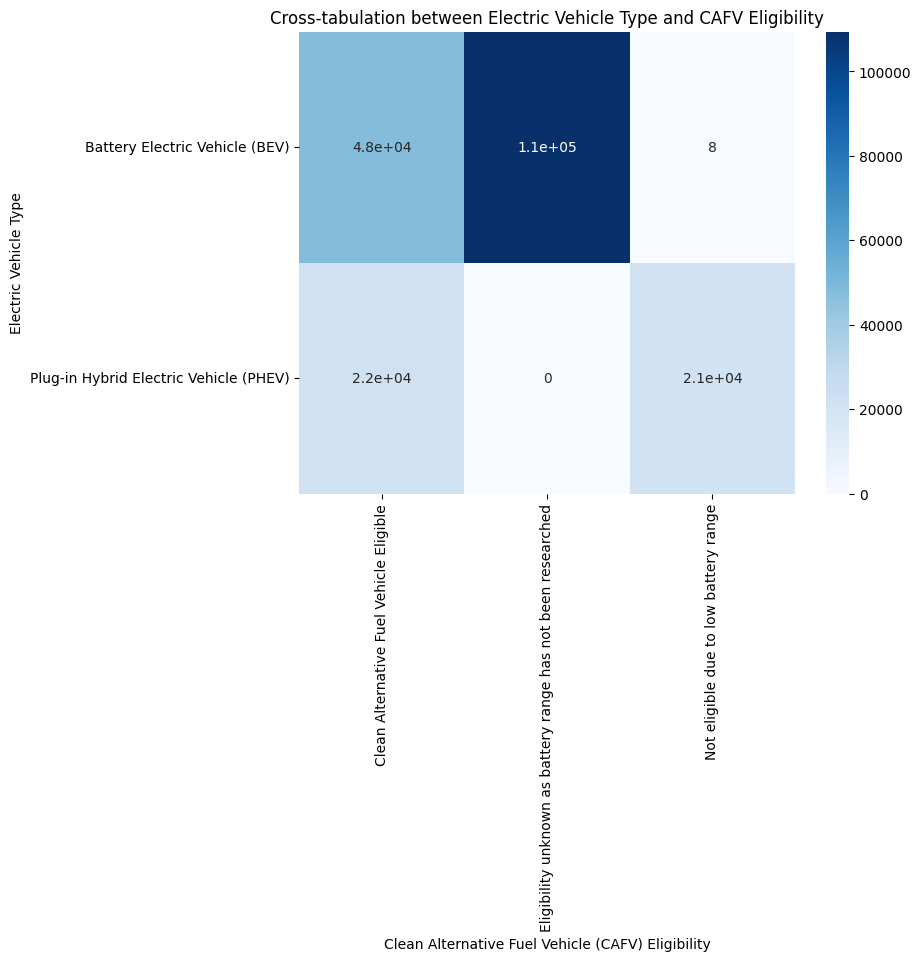

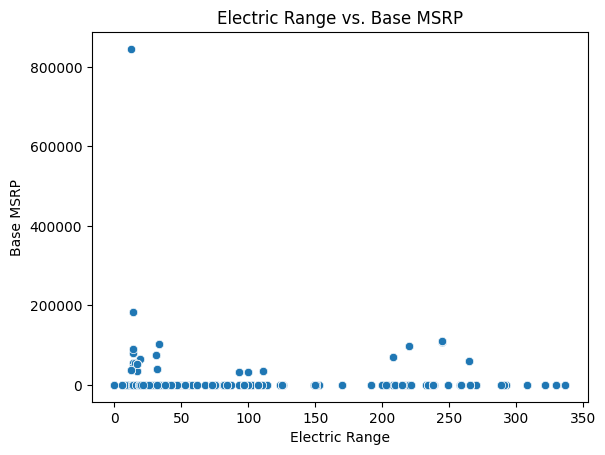

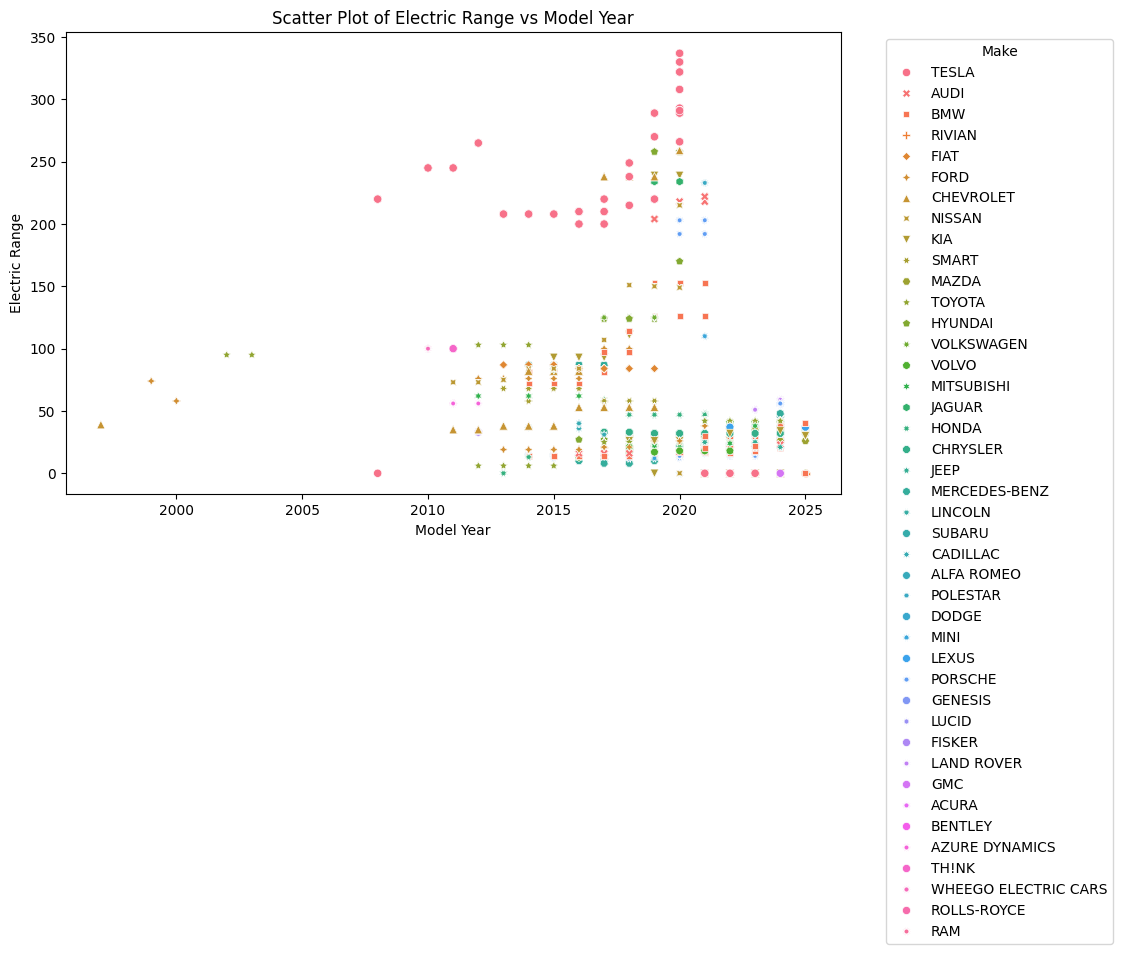

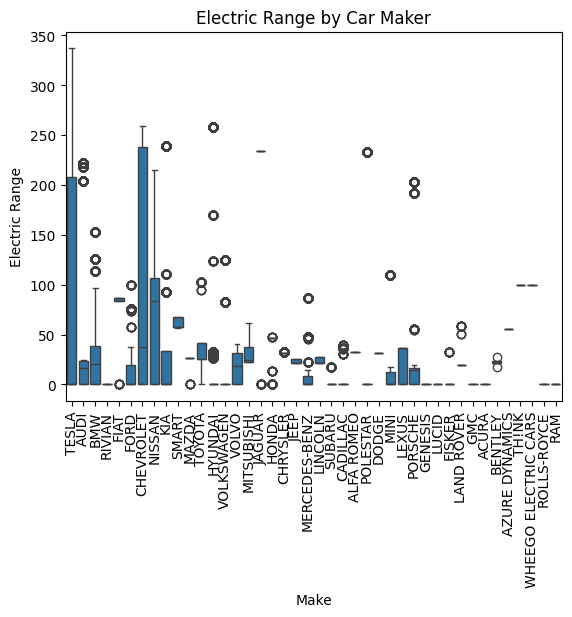

In [13]:
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number])

# Pearson Correlation Matrix
pearson_corr = numeric_cols.corr(method='pearson')

# Spearman Correlation Matrix
spearman_corr = numeric_cols.corr(method='spearman')

# Visualize Pearson Correlation Matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualize Spearman Correlation Matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

correlation_matrix = df[['Electric Range', 'Base MSRP', 'Model Year']].corr(method='pearson')

# Heatmap for correlations
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Cross-tabulation between Electric Vehicle Type and Clean Alternative Fuel Vehicle (CAFV) Eligibility
crosstab_result = pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Visualize cross-tabulation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_result, annot=True, cmap='Blues')
plt.title('Cross-tabulation between Electric Vehicle Type and CAFV Eligibility')
plt.show()

# Scatter plot between Electric Range and Base MSRP
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs. Base MSRP')
plt.show()

# Scatter plot ER and Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', hue='Make', style='Make')
plt.title('Scatter Plot of Electric Range vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Boxplot of Electric Range across Makes
sns.boxplot(x='Make', y='Electric Range', data=df)
plt.xticks(rotation=90)
plt.title('Electric Range by Car Maker')
plt.show()


### Step 7: Multivariate Analysis
- **Pairplot/Scatterplot Matrix**
- **Multivariate Statistics**
- **Advanced Visualizations**

In [14]:
sns.pairplot(df, hue='Make')
plt.title('Pair Plot of Electric Vehicle Data')
plt.show()

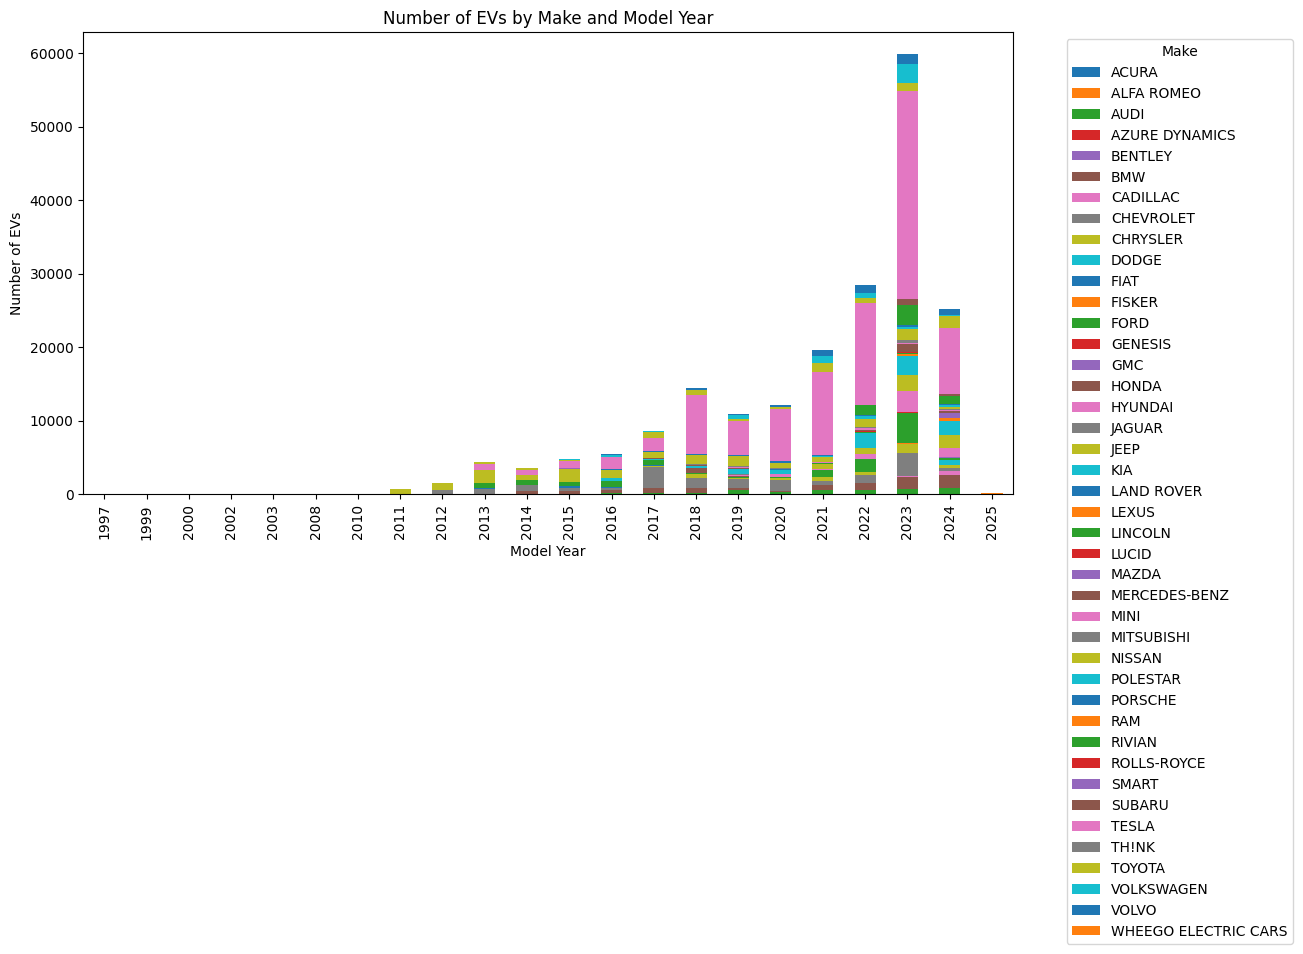

In [24]:
stacked_data = df.groupby(['Model Year', 'Make']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of EVs by Make and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Step 8: Feature Engineering
- **Create New Features**
- **Feature Transformation**
- **Encoding Categorical Variables**

Suggestion for New Feature:
- Average ER on the City, County, Make/Model level
- Age of Vehicle
- Create a new feature that combines Model Year and Make to see if certain manufacturers are more popular in specific years.
- Create a feature that combines City and Make to see which manufacturers are dominant in specific cities.
- Range Category:
    - Create categorical bins for Electric Range to identify different range segments (e.g., Low, Medium, High).
    - Normalized Electric Range: Scale the electric range to a 0-1 range using Min-Max normalization.

### Step 9: Handle Imbalanced Data (If Applicable)
- **Resampling Techniques**: Use oversampling, under-sampling, or SMOTE if the target variable is imbalanced

### Step 10: Analyze and Validate Assumptions
- **Check for Multicollinearity**: Use VIF (Variance Inflation Factor) to detect multicollinearity among predictors.
- **Normality Testing**: Test if numerical data follows a normal distribution (e.g., using the Shapiro-Wilk test).
- **Homoscedasticity**: Check the equality of variance across groups

### Step 11: Preliminary Insights and Hypotheses
- **Identify Key Findings**
- **Generate Hypotheses**

In [ ]:
### 1. **Most Common Car Manufacturers for EVs in Washington**:
#   - Use `value_counts()` on the **Make** column to find the most frequent car manufacturers.
df['Make'].value_counts().head(10)

### 2. **Highest and Lowest Electric Ranges and Their Car Makers/Models**:
#   - Find the maximum and minimum values of the **Electric Range** and identify the corresponding car models.
highest_range = df['Electric Range'].max()
lowest_range = df['Electric Range'].min()

max_range_car = df[df['Electric Range'] == highest_range][['Make', 'Model']]
min_range_car = df[df['Electric Range'] == lowest_range][['Make', 'Model']]
print(max_range_car, min_range_car)

### 3. **Is the Maximum Electric Range Unique?**:
#   - Filter the dataset to check how many vehicles have the maximum electric range.
cars_with_max_range = df[df['Electric Range'] == highest_range]
cars_with_max_range

### 4. **Is the Minimum Electric Range Unique?**:
#   - Similar to the maximum range, filter to check how many cars have the minimum electric range.
cars_with_min_range = df[df['Electric Range'] == lowest_range]
cars_with_min_range

### 5. **Variation in Electric Range Between Car Makers and Models**:
#   - Use `groupby()` to calculate the average electric range by car maker and model.
range_by_maker_model = df.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()
range_by_maker_model

### 6. **Top 5 Cities Adopting EVs**:
#   - Use `value_counts()` on the **City** column to find the top 5 cities with the most EVs.
top_cities = df['City'].value_counts().head(5)
top_cities

### 7. **EV Adoption Rate by Car Makers Over the Years**:
#   - Use `groupby()` on **Make** and **Model Year** to track how EV adoption has changed over time.
adoption_rate_by_maker_year = df.groupby(['Make', 'Model Year']).size().reset_index(name='Count')
adoption_rate_by_maker_year

### 8. **Correlation Between Electric Range and City**:
#   - This can be checked using correlation analysis between **Electric Range** and **City**.
#   - Since cities are categorical, you may need to encode the cities and then calculate correlation.

# [Result]

### 9. **County with the Greatest Variety of EV Models**:
variety_by_county = df.groupby('County')['Model'].nunique().reset_index(name='Unique Models')
top_county = variety_by_county.sort_values(by='Unique Models', ascending=False).head(1)
top_county

### Step 12: Document and Communicate Findings
- **Create Visual Summaries**
- **Write a Summary Report**

### Step 13: Next Steps
- **Plan for Further Analysis**

### Step 14: Review and Reiterate
- **Review EDA**
- **Iterate as Needed**